In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
import pandas as pd
import nltk
import re
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
datatrain = pd.read_excel('/content/gdrive/MyDrive/ML/NLP 01/Constraint_English_Train.xlsx')
datatest = pd.read_excel('/content/gdrive/MyDrive/ML/NLP 01/Constraint_English_Val.xlsx')

#split dataset to input X and outcome Y
#datatrain
X_train = datatrain['tweet']
y_train = datatrain['label']
y_train = [1 if x == 'real' else 0 for x in y_train]
#datatest
X_test = datatest['tweet']
y_test = datatest["label"]
y_test = [1 if x == 'real' else 0 for x in y_test]

In [10]:
datatrain.isna().sum()
#Kiểm tra rỗng trên tập train

id       0
tweet    0
label    0
dtype: int64

In [11]:
datatest.isna().sum()
#Kiểm tra rỗng trên tập test

id       0
tweet    0
label    0
dtype: int64

In [12]:
datatrain.label.value_counts()
#đếm số câu trên mỗi nhãn trên tập train

real    3360
fake    3060
Name: label, dtype: int64

In [13]:
datatest.label.value_counts()
#đếm số câu trên mỗi nhãn trên tập test

real    1120
fake    1020
Name: label, dtype: int64

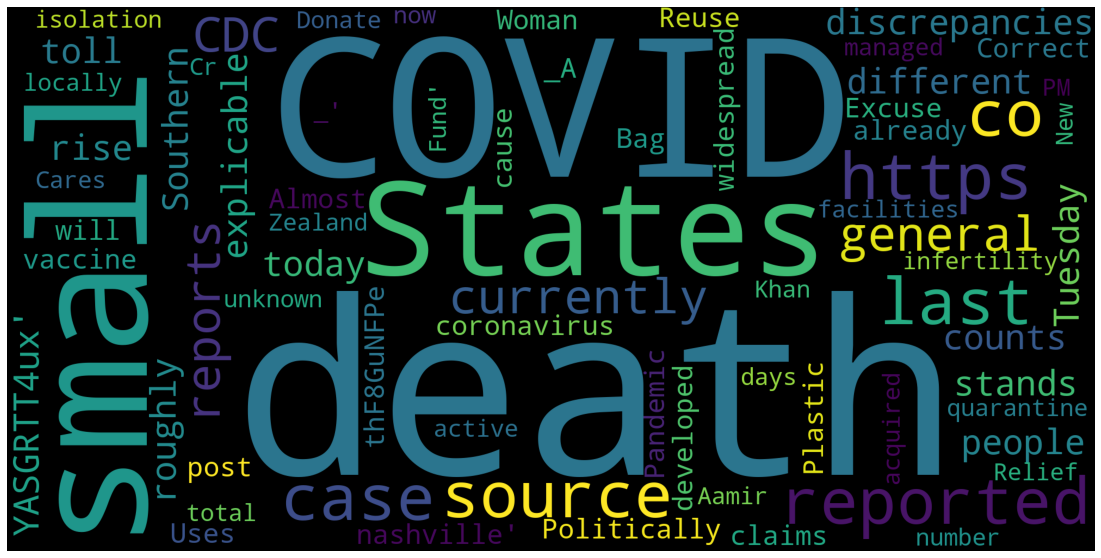

In [14]:
import wordcloud
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
get_ipython().run_line_magic('matplotlib', 'inline')
cloud = np.array(datatrain["tweet"]).flatten()
plt.figure(figsize=(20,10))
word_cloud = wordcloud.WordCloud(max_words=100,background_color ="black",
                               width=2000,height=1000,mode="RGB").generate(str(cloud))
plt.axis("off")
plt.imshow(word_cloud)
# Kiểm tra tấn suất xuất hiện của 1 từ, từ đó xuất hiện càng nhiều thì kích cỡ chữ càng lớn

In [15]:
#tiền xử lý
X_train = []
for tweet in datatrain.values[:, 1]:
    tweet = re.sub("[^a-zA-Z]", " ", tweet)
    tweet = tweet.split()
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet if word not in stopwords.words("english")]
    tweet = " ".join(tweet)
    X_train.append(tweet)

X_test = []
for tweet in datatest.values[:, 1]:
    tweet = re.sub("[^a-zA-Z]", " ", tweet)
    tweet = tweet.split()
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet if word not in stopwords.words("english")]
    tweet = " ".join(tweet)
    X_test.append(tweet)

In [16]:
token_count= sum(len(sen) for sen in X_train)
print("Có {0:,} từ".format(token_count))

Có 761,486 từ


In [17]:
token_count= sum(len(sen) for sen in X_test)
print("Có {0:,} từ".format(token_count))

Có 250,245 từ


In [18]:
#vector hóa
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [19]:
#Số từ trong từ điển hiện tại
print(X_train.shape[1])

14381


In [20]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
lr_prediction = logreg.predict(X_test)
logreg.score(X_test, y_test)

0.9238317757009346

In [21]:
#Decision Tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_test)
dtc.score(X_test, y_test)

0.8957943925233645

In [22]:
#Random forest classifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)
rfc.score(X_test, y_test)

0.9060747663551402

In [23]:
#Kernel SVM
kn = SVC(kernel = "rbf")
kn.fit(X_train, y_train)
kn_predict = kn.predict(X_test)
kn.score(X_test, y_test)

0.9299065420560748

In [24]:
#Naive Bayes
nb = GaussianNB()
nb.fit(X_train.toarray(), y_train)
nb_predict = nb.predict(X_test.toarray())
nb.score(X_test.toarray(), y_test)

0.8817757009345795

In [25]:
#recall của Logistic Regression
recall_score(y_test, logreg.predict(X_test))

0.9223214285714286

In [26]:
#recall của Decision Tree classifier
recall_score(y_test, dtc.predict(X_test))

0.9089285714285714

In [27]:
#recall của Random forest classifier
recall_score(y_test, rfc.predict(X_test))

0.9035714285714286

In [28]:
#recall của Kernel SVM
recall_score(y_test, kn.predict(X_test))

0.9401785714285714

In [29]:
#recall của Naive Bayes
recall_score(y_test, nb.predict(X_test.toarray()))

0.90625

In [30]:
#precision của Logistic Regression
precision_score(y_test, logreg.predict(X_test))

0.9314697926059513

In [31]:
#precision của Decision Tree classifier
precision_score(y_test, dtc.predict(X_test))

0.8937664618086041

In [32]:
#precision của Random forest classifier
precision_score(y_test, rfc.predict(X_test))

0.9158371040723982

In [33]:
#precision của Kernel SVM
precision_score(y_test, kn.predict(X_test))

0.9269366197183099

In [34]:
#precision của Naive Bayes
precision_score(y_test, nb.predict(X_test.toarray()))

0.8727429062768701

In [35]:
#F1 của Logistic Regression
f1_score(y_test, logreg.predict(X_test))

0.926873037236429

In [36]:
#F1 của Decision Tree classifier
f1_score(y_test, dtc.predict(X_test))

0.9012837538733953

In [37]:
#F1 của Random forest classifier
f1_score(y_test, rfc.predict(X_test))

0.9096629213483146

In [38]:
#F1 của Kernel SVM
f1_score(y_test, kn.predict(X_test))

0.9335106382978723

In [39]:
#F1 của Naive Bayes
f1_score(y_test, nb.predict(X_test.toarray()))

0.8891809023215067

In [40]:
#accuracy của Logistic Regression
accuracy_score(y_test, logreg.predict(X_test))

0.9238317757009346

In [41]:
#accuracy của Decision Tree classifier
accuracy_score(y_test, dtc.predict(X_test))

0.8957943925233645

In [42]:
#accuracy của Random forest classifier
accuracy_score(y_test, rfc.predict(X_test))

0.9060747663551402

In [43]:
#accuracy của Kernel SVM
accuracy_score(y_test, kn.predict(X_test))

0.9299065420560748

In [44]:
#accuracy của Naive Bayes
accuracy_score(y_test, nb.predict(X_test.toarray()))

0.8817757009345795